## **EDA:** Análisis exploratorio de datos

#### Importar librerías:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Cargar data:

In [2]:
# Temperatura
df_maxim = pd.read_csv('data_temperatura/maximo_temperaturas_santiago.csv')
df_minim = pd.read_csv('data_temperatura/media_temperaturas_minimas_santiago.csv')
df_media = pd.read_csv('data_temperatura/media_temperaturas_santiago.csv')
df_maxim = df_maxim.drop_duplicates()
df_minim = df_minim.drop_duplicates()
df_media = df_media.drop_duplicates()

# Humedad, precipitación, y presión
df_humed = pd.read_csv('data_temperatura/humedad_mensual_santiago.csv')
df_preci = pd.read_csv('data_temperatura/precipitaciones_mensuales_santiago.csv') # Precipitación
df_presi = pd.read_csv('data_temperatura/presion_mensual_santiago.csv') # Presión
df_humed = df_humed.drop_duplicates()
df_preci = df_preci.drop_duplicates()
df_presi = df_presi.drop_duplicates()

#### Mostrar y checkear data:

In [3]:
# Temperatura
display(df_maxim.head(2))
display(df_minim.head(2))
display(df_media.head(2))
# Humedad, precipitación, y presión
display(df_humed.head(2))
display(df_preci.head(2))

,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,1920,34.0,33.0,32.7,28.8,28.8,22.8,21.7,23.5,30.0,28.0,32.2,32.4
1,1921,34.5,32.3,33.0,28.2,24.5,22.3,25.4,27.5,26.5,29.0,34.0,33.3


,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,1920,12.174194,11.182759,10.041935,6.893333,5.832258,3.84,1.629032,3.703226,5.706667,6.419355,9.583333,11.374194
1,1921,11.561290,10.464286,9.141935,6.413333,7.551613,0.43,1.025806,3.590323,4.833333,7.777419,10.083333,10.432258


,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,1920,29.474194,29.320690,28.683871,23.333333,19.090323,14.190000,14.880645,17.722581,19.733333,21.151613,25.460000,27.451613
1,1921,29.319355,28.742857,26.061290,23.170000,18.854839,14.086667,15.941935,16.967742,18.306667,22.216129,26.013333,27.925806


,Año,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,1970,51.025,52.675862,57.009375,62.074194,74.796875,80.883871,83.184375,76.937500,71.267742,66.04375,54.487097,51.978125
1,1971,47.550,56.934483,63.403226,63.645161,72.062500,84.161290,79.421875,77.021875,73.896774,70.42500,58.622581,56.628125


,Años,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic,Anual
0,2025,0.0,0.0,5.4,0.5,61.3,71.2,23.3,46.0,15.3,3.6,4.3,NaN,226.6
1,2024,0.0,2.8,0.0,0.2,112.4,183.1,0.0,80.6,5.9,10.0,0.0,0.0,395.0


In [4]:
# Temperatura
display(df_maxim.tail(2))
display(df_minim.tail(2))
display(df_media.tail(2))
# Humedad y precipitación
display(df_humed.tail(2))
display(df_preci.tail(2))

,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
163,2023,34.4,35.8,34.1,32.5,29.0,26.9,26.1,27.4,26.3,27.9,32.8,35.7
164,2024,37.3,36.1,32.7,32.1,22.5,21.5,25.6,25.8,28.0,34.3,32.2,35.6


,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
103,2023,13.512903,13.814286,12.751613,9.393333,6.338710,5.893333,5.345161,6.574194,8.113333,7.829032,9.076667,11.412903
104,2024,13.770968,14.493103,11.922581,9.353333,3.567742,5.886667,2.067742,4.151613,6.183333,9.383871,10.063333,11.496774


,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
163,2023,30.829032,32.628571,30.706452,25.020000,20.719355,17.946667,17.341935,19.016129,18.243333,21.929032,24.33,28.919355
164,2024,31.832258,31.834483,30.174194,23.383333,15.935484,15.176667,17.393548,16.516129,21.550000,25.222581,27.32,29.938710


,Año,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
53,2023,49.546875,46.544828,52.303125,60.941935,74.012500,78.100000,79.896875,75.88125,74.880645,66.712500,62.425806,53.784375
54,2024,51.759375,53.523333,52.350000,60.487097,78.471875,84.293548,74.671875,75.35625,64.467742,65.378125,52.803226,50.490625


,Años,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic,Anual
110,1915,0.1,3.5,1.3,21.3,110.4,77.3,NaN,9.3,2.1,2.1,0.3,0.0,227.7
111,1914,0.0,0.0,0.0,6.4,21.7,245.1,125.0,72.7,103.5,58.5,70.6,0.0,703.5


In [5]:
#print(f'Tipos de datos en df_maxim \n{df_maxim.dtypes}\nCantidad de NaN en df_maxim \n{df_maxim.isna().sum()}\n')
#print(f'Tipos de datos en df_media \n{df_media.dtypes}\nCantidad de NaN en df_media \n{df_media.isna().sum()}')

Todo bien! :D

#### Añadir elementos a DataFrame antes de graficarlo.

In [6]:
df_media.head(2)

,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,1920,29.474194,29.320690,28.683871,23.333333,19.090323,14.190000,14.880645,17.722581,19.733333,21.151613,25.460000,27.451613
1,1921,29.319355,28.742857,26.061290,23.170000,18.854839,14.086667,15.941935,16.967742,18.306667,22.216129,26.013333,27.925806


In [11]:
## Solo me importa el verano, saco los demás meses.
# Temperatura
df_media_v = df_media[['Año', 'Noviembre', 'Diciembre', 'Enero', 'Febrero', 'Marzo']].copy()
df_maxim_v = df_maxim[['Año', 'Noviembre', 'Diciembre', 'Enero', 'Febrero', 'Marzo']].copy()
df_minim_v = df_minim[['Año', 'Noviembre', 'Diciembre', 'Enero', 'Febrero', 'Marzo']].copy()
# Humedad, precipitación, presión
df_humed_v = df_humed[['Año', 'Nov', 'Dic', 'Ene', 'Feb', 'Mar']].copy()
df_preci_v = df_preci[['Años', 'Nov', 'Dic', 'Ene', 'Feb', 'Mar']].copy()
df_presi_v = df_presi[['Año', 'Nov', 'Dic', 'Ene', 'Feb', 'Mar']].copy()

meses = df_media_v.columns.drop('Año')
df_media_v['Media_verano'] = df_media_v[meses].mean(axis=1)
display(df_media_v.head(2))

df_maxim_v['Max'] = df_maxim_v[meses].max(axis=1)
display(df_maxim_v.head(2))

df_minim_v['Min'] = df_minim_v[meses].mean(axis=1)
display(df_minim_v.head(2))

df_humed_v['Humedad_media'] = df_humed_v[['Nov', 'Dic', 'Ene', 'Feb', 'Mar']].mean(axis=1)
df_preci_v['Media_precipitación'] = df_preci_v[['Nov', 'Dic', 'Ene', 'Feb', 'Mar']].mean(axis=1)
df_presi_v['Media_presión'] = df_presi_v[['Nov', 'Dic', 'Ene', 'Feb', 'Mar']].mean(axis=1)
display(df_humed_v.head(2))

display(df_presi.head(2))

,Año,Noviembre,Diciembre,Enero,Febrero,Marzo,Media_verano
0,1920,25.460000,27.451613,29.474194,29.320690,28.683871,28.078073
1,1921,26.013333,27.925806,29.319355,28.742857,26.061290,27.612528


,Año,Noviembre,Diciembre,Enero,Febrero,Marzo,Max
0,1920,32.2,32.4,34.0,33.0,32.7,34.0
1,1921,34.0,33.3,34.5,32.3,33.0,34.5


,Año,Noviembre,Diciembre,Enero,Febrero,Marzo,Min
0,1920,9.583333,11.374194,12.174194,11.182759,10.041935,10.871283
1,1921,10.083333,10.432258,11.561290,10.464286,9.141935,10.336621


,Año,Nov,Dic,Ene,Feb,Mar,Humedad_media
0,1970,54.487097,51.978125,51.025,52.675862,57.009375,53.435092
1,1971,58.622581,56.628125,47.550,56.934483,63.403226,56.627683


,Año,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,1970,953.940625,953.203448,953.771875,954.251613,956.656250,958.435484,958.040625,958.468750,956.287097,955.500000,955.680645,953.390625
1,1971,953.468750,953.237931,954.493548,955.819355,956.740625,957.654839,957.175000,958.678125,957.283871,956.028125,954.832258,952.821875


In [13]:
# Unión de DataFrames!
## Temperatura
df_short_media_v = df_media_v[['Año', 'Media_verano']].copy()
df_short_media_v = df_short_media_v.rename(columns={'Media_verano' : 'Media_temperatura'})

df_short_maxim_v = df_maxim_v[['Año', 'Max']].copy()
df_short_maxim_v = df_short_maxim_v.rename(columns={'Max' : 'Max_temperatura'})

df_short_minim_v = df_minim_v[['Año', 'Min']].copy()
df_short_minim_v = df_short_minim_v.rename(columns={'Min' : 'Min_temperatura'})

df_merge_1 = pd.merge(df_short_media_v, df_short_maxim_v, on='Año', how='inner')
df_merge_2 = pd.merge(df_merge_1, df_short_minim_v, on='Año', how='inner')

display(df_merge_2.head(1))

## Humedad, precipitación, presión
df_short_humed_v = df_humed_v[['Año', 'Humedad_media']].copy()
df_short_humed_v = df_short_humed_v.rename(columns={'Humedad_media' : 'Media_humedad'})

df_short_preci_v = df_preci_v[['Años', 'Media_precipitación']].copy()
df_short_preci_v = df_short_preci_v.rename(columns={'Años' : 'Año'})

df_short_presi_v = df_presi_v[['Año', 'Media_presión']].copy()

df_merge_3 = pd.merge(df_short_humed_v, df_short_preci_v, on='Año', how='inner')
df_merge_4 = pd.merge(df_merge_3, df_short_presi_v, on='Año', how='inner')
df_combinado = pd.merge(df_merge_4, df_merge_2, on='Año', how='inner')

display(df_combinado.head(5))

,Año,Media_temperatura,Max_temperatura,Min_temperatura
0,1920,28.078073,34.0,10.871283


,Año,Media_humedad,Media_precipitación,Media_presión,Media_temperatura,Max_temperatura,Min_temperatura
0,1970,53.435092,0.00,953.997444,28.185866,34.8,11.279797
1,1971,56.627683,0.74,953.770872,27.793316,34.2,10.725329
2,1972,54.700169,3.04,953.554386,28.366167,34.4,11.718688
3,1973,60.260827,0.04,954.221370,27.852448,34.3,10.967781
4,1974,59.046087,3.54,954.040553,27.091475,32.4,10.866816


### **Gráficos:**

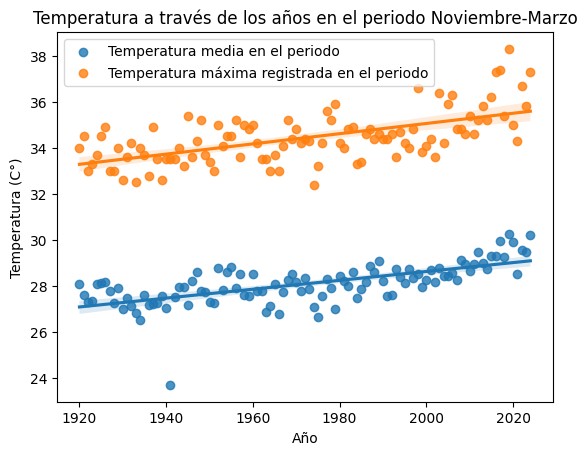

In [14]:
sns.regplot(data=df_media_v, x='Año', y='Media_verano', label='Temperatura media en el periodo')
sns.regplot(data=df_maxim_v, x='Año', y='Max', label='Temperatura máxima registrada en el periodo')

plt.title('Temperatura a través de los años en el periodo Noviembre-Marzo')
plt.ylabel('Temperatura (C°)')
plt.legend()

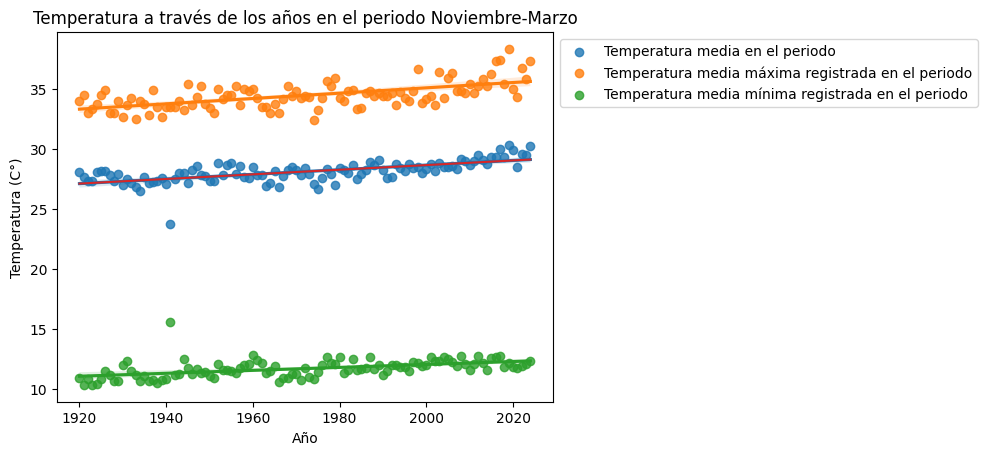

In [15]:
from sklearn.linear_model import LinearRegression

X = df_media_v['Año'].values.reshape(-1, 1)
y = df_media_v['Media_verano'].values.reshape(-1, 1)

modelo = LinearRegression()
modelo.fit(X, y)

y_predict = modelo.predict(X)

sns.regplot(data=df_media_v, x='Año', y='Media_verano', label='Temperatura media en el periodo')
sns.regplot(data=df_maxim_v, x='Año', y='Max', label='Temperatura media máxima registrada en el periodo')
sns.regplot(data=df_minim_v, x='Año', y='Min', label='Temperatura media mínima registrada en el periodo')

plt.title('Temperatura a través de los años en el periodo Noviembre-Marzo')
plt.ylabel('Temperatura (C°)')
plt.legend(bbox_to_anchor=(1, 1))

plt.plot(df_media_v['Año'], y_predict)

Text(0.5, 0, 'Temperatura (C°)')

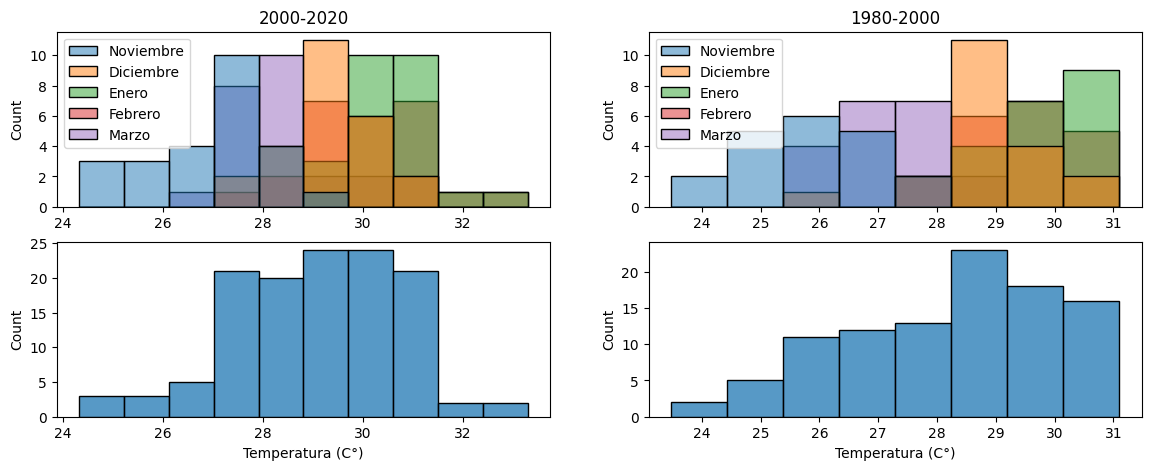

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(14,5))

df_media_2000 = df_media[df_media['Año'] >= 2000].copy()
df_media_2000 = df_media_2000.reset_index(drop=True)
df_media_2000_v = df_media_2000[['Año', 'Noviembre', 'Diciembre', 'Enero', 'Febrero', 'Marzo']].copy()

df_2000_v_melted = pd.melt(df_media_2000_v, id_vars='Año')

sns.histplot(df_media_2000_v[['Noviembre', 'Diciembre', 'Enero', 'Febrero', 'Marzo']], ax=ax[0, 0])
sns.histplot(df_2000_v_melted['value'], ax=ax[1, 0])

df_media_1980 = df_media[( (df_media['Año'] < 2000) & (df_media['Año'] >= 1980) )].copy()
df_media_1980 = df_media_1980.reset_index(drop=True)
df_media_1980_v = df_media_1980[['Año', 'Noviembre', 'Diciembre', 'Enero', 'Febrero', 'Marzo']].copy()

df_1980_v_melted = pd.melt(df_media_1980_v, id_vars='Año')

sns.histplot(df_media_1980_v[['Noviembre', 'Diciembre', 'Enero', 'Febrero', 'Marzo']], ax=ax[0, 1])
sns.histplot(df_1980_v_melted['value'], ax=ax[1, 1])

ax[0, 0].set_title('2000-2020')
ax[1, 0].set_xlabel('Temperatura (C°)')
ax[0, 1].set_title('1980-2000')
ax[1, 1].set_xlabel('Temperatura (C°)')

<Axes: >

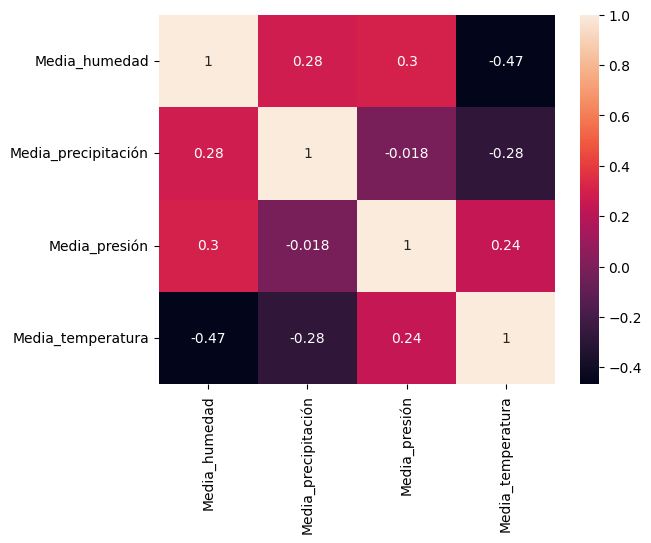

In [20]:
corr_combinado = df_combinado[['Media_humedad', 'Media_precipitación', 'Media_presión', 'Media_temperatura']].corr()
sns.heatmap(corr_combinado, annot=True)